In [1]:
import numpy as np
import xarray as xr
from xgcm import Grid

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ds = xr.Dataset(coords={'x_c': (['x_c',], np.arange(1,10)),
                        'x_g': (['x_g',], np.arange(0.5,9))})
print(ds)

<xarray.Dataset>
Dimensions:  (x_c: 9, x_g: 9)
Coordinates:
  * x_c      (x_c) int64 1 2 3 4 5 6 7 8 9
  * x_g      (x_g) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5
Data variables:
    *empty*


In [3]:
grid = Grid(ds, coords={'X':{'center': 'x_c', 'left': 'x_g'}})
print(grid)

<xgcm.Grid>
X Axis (periodic):
  * center   x_c (9) --> left
  * left     x_g (9) --> center


In [4]:
ds = xr.Dataset(coords={'x_c': (['x_c',], np.arange(1,10), {'axis': 'X'}),
                        'x_g': (['x_g',], np.arange(0.5,9),
                                {'axis': 'X', 'c_grid_axis_shift': -0.5})})
print(ds)

<xarray.Dataset>
Dimensions:  (x_c: 9, x_g: 9)
Coordinates:
  * x_c      (x_c) int64 1 2 3 4 5 6 7 8 9
  * x_g      (x_g) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5
Data variables:
    *empty*


In [5]:
grid = Grid(ds)
print(grid)

<xgcm.Grid>
X Axis (periodic):
  * center   x_c (9) --> left
  * left     x_g (9) --> center


In [6]:
f = np.sin(ds.x_c * 2*np.pi/9)
print(f)

<xarray.DataArray 'x_c' (x_c: 9)>
array([ 6.427876e-01,  9.848078e-01,  8.660254e-01,  3.420201e-01,
       -3.420201e-01, -8.660254e-01, -9.848078e-01, -6.427876e-01,
       -2.449294e-16])
Coordinates:
  * x_c      (x_c) int64 1 2 3 4 5 6 7 8 9


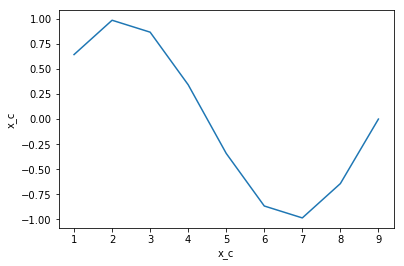

In [7]:
f.plot()

In [8]:
f_interp = grid.interp(f, axis='X')
print(f_interp)

<xarray.DataArray (x_g: 9)>
array([ 3.213938e-01,  8.137977e-01,  9.254166e-01,  6.040228e-01,
        1.110223e-16, -6.040228e-01, -9.254166e-01, -8.137977e-01,
       -3.213938e-01])
Coordinates:
  * x_g      (x_g) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5


In [9]:
f_diff = grid.diff(f, axis='X')
f_diff

<xarray.DataArray (x_g: 9)>
array([ 0.642788,  0.34202 , -0.118782, -0.524005, -0.68404 , -0.524005,
       -0.118782,  0.34202 ,  0.642788])
Coordinates:
  * x_g      (x_g) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5

In [10]:
grid.cumsum(f_diff, 'X')

<xarray.DataArray (x_c: 9)>
array([ 0.642788,  0.984808,  0.866025,  0.34202 , -0.34202 , -0.866025,
       -0.984808, -0.642788,  0.      ])
Coordinates:
  * x_c      (x_c) int64 1 2 3 4 5 6 7 8 9